## **STATISTICAL ANALYSIS OF FACTORS AFFECTING CUSTOMER RATINGS**

PHASES:
1. Data Setup and Cleaning
2. EDA
3. Hypothesis Testing

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **🧱 Phase 1: Data Setup & Cleaning**

In [3]:
#import dataset using panda- [encoding used as it contains latin characters]
df = pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv', encoding='mac_roman')

In [4]:
#checking structure of data
df.head()
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml€± Gurme,208,€¡stanbul,"KemankeÅÙ Karamustafa PaÅÙa Mahallesi, R€±ht€±...",KarakÌ_y,"KarakÌ_y, €¡stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A€Ùac€±,208,€¡stanbul,"KoÅÙuyolu Mahallesi, Muhittin ÌÏstÌ_nda€Ù Cadd...",KoÅÙuyolu,"KoÅÙuyolu, €¡stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,€¡stanbul,"KuruÌ_eÅÙme Mahallesi, Muallim Naci Caddesi, N...",KuruÌ_eÅÙme,"KuruÌ_eÅÙme, €¡stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,AÅÙÅÙk Kahve,208,€¡stanbul,"KuruÌ_eÅÙme Mahallesi, Muallim Naci Caddesi, N...",KuruÌ_eÅÙme,"KuruÌ_eÅÙme, €¡stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,€¡stanbul,"Cafea€Ùa Mahallesi, Bademalt€± Sokak, No 21/B,...",Moda,"Moda, €¡stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


observation: text in city column show some weird characters

In [5]:
df['City'].unique() #checking if all the characters are proper

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'BrasÌ_lia', 'Rio de Janeiro', 'SÌ£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

Fixing the encoding issue:
-> finding out the encoding type to use for loading dataset

In [6]:
!pip install chardet


In [7]:
import chardet

# Detect encoding using chardet
with open('/kaggle/input/zomato-restaurants-data/zomato.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result)


{'encoding': 'MacRoman', 'confidence': 0.707087591240876, 'language': ''}


In [8]:
df.dtypes #checking if all the data types are correct or if conversion is needed

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

**Observation**: All the columns have correct data types

In [9]:
#fixing issues of characters in city column
df['City'] = df['City'].replace({
    '€¡stanbul': 'İstanbul',
    'ÛÁstanbul': 'İstanbul',
    'Û¡stanbul': 'İstanbul',
    '€stanbul': 'İstanbul',
})


In [10]:
#making sure weird characters from all the columns are fixed
import re

def remove_weird_chars(text):
    if isinstance(text, str):
        text = re.sub(r'[^\x00-\x7FğüşıöçĞÜŞİÖÇ ]+', '', text)  # remove non-ASCII except Turkish
    return text

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(remove_weird_chars)


In [11]:
print('City Values After Fixing:')
df['City'].unique()


City Values After Fixing:


array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras_lia', 'Rio de Janeiro', 'So Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham E

In [12]:
def structure_of_dataset(df):
    print("Shape of dataset:")
    print(" Rows:", df.shape[0], "| Columns:", df.shape[1])
    print("\n Info:")
    print(df.info())
    print("\n Description:")
    print(df.describe(include='all'))
    print("\n Null values:")
    print(df.isnull().sum())
    print("\n Duplicates:")
    print(df.duplicated().sum())

structure_of_dataset(df)

Shape of dataset:
 Rows: 9551 | Columns: 21

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [13]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [14]:
#Dropping unnecessary columns
cols_to_drop=['Restaurant Name','Restaurant ID','Is delivering now','Switch to order menu','Country Code','Address', 'Locality',
 'Locality Verbose','Longitude','Latitude','Rating color','Currency']
df.drop(columns=cols_to_drop,inplace=True)

In [15]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

Both "Has Online Delivery" and "Has Table booking Columns" have Values yes or no.
So Converting these columns to boolean types: True if "yes", False otherwise.

Because it:

Simplifies comparisons

Makes plotting easier (e.g., hue=True/False)

Helps with statistical tests (e.g., groupby, t-test)

In [16]:
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower() == 'yes'
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower() == 'yes'


In [17]:
# Show final cleaned column names and data types
print("✅ Final dataset structure (columns after cleaning):\n")
print(df.dtypes)

# Optional: Shape
print("\nRows and columns remaining:", df.shape)


✅ Final dataset structure (columns after cleaning):

City                     object
Cuisines                 object
Average Cost for two      int64
Has Table booking          bool
Has Online delivery        bool
Price range               int64
Aggregate rating        float64
Rating text              object
Votes                     int64
dtype: object

Rows and columns remaining: (9551, 9)


In [18]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


**Descriptive Statistics – Key Insights:**

💸 Cost: Most restaurants are affordable (75% charge < ₹700), but a few extreme outliers exist.

💰 Price Range: Majority fall in tier 1 or 2, showing dominance of budget-friendly places.

⭐ Ratings: Mean rating is 2.66, but most places are rated 3.2+, with few scoring below 2 or above 4.5.

🗳️ Votes: Highly skewed — a few restaurants get massive public attention, most are less rated.

In [19]:
df.describe(include='object')


,City,Cuisines,Rating text
count,9551,9542,9551
unique,141,1825,6
top,New Delhi,North Indian,Average
freq,5473,936,3737


**Categorical Data Overview:**

🏙️ New Delhi dominates the dataset (57% entries), followed by a long tail of other cities.

🍱 Over 1,800 cuisine types, but North Indian is the most frequent.

🪑 Table booking is rare (~ 12%), while online delivery is more common (~ 26%).

⭐ Most restaurants are rated as "Average", hinting at overall moderate satisfaction levels.

## **📊 Phase 2: Exploratory Data Analysis (EDA)**

In [20]:
#GET VALUE COUNTS
print(df['Has Online delivery'].value_counts())
print('\n')
print(df['Has Table booking'].value_counts())
print('\n')
print(df['Rating text'].value_counts())
print('\n')
print(df['Votes'].value_counts())
print('\n')
print(df['Average Cost for two'].value_counts())
print('\n')
print(df['City'].value_counts())
print('\n')



Has Online delivery
False    7100
True     2451
Name: count, dtype: int64


Has Table booking
False    8393
True     1158
Name: count, dtype: int64


Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64


Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64


City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, 

# **Distribution of Aggregate Rating by-**

---



1. Online delivery status

2. Table booking

3. Price range


In [21]:
print(df.groupby('Has Online delivery')['Aggregate rating'].mean())
print('\n')
print(df.groupby('Has Table booking')['Aggregate rating'].mean())
print('\n')
print(df.groupby('Price range')['Aggregate rating'].mean())


Has Online delivery
False    2.465296
True     3.248837
Name: Aggregate rating, dtype: float64


Has Table booking
False    2.559359
True     3.441969
Name: Aggregate rating, dtype: float64


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


💡 Key Rating Insights:

📦 Online Delivery: Avg rating = 3.25 (vs 2.47 without delivery)

🪑 Table Booking: Avg rating = 3.44 (vs 2.56 without)

💰 Price Range: Rating increases with price (2.0 → 3.8)

🧠 These features appear to be positively correlated with customer satisfaction and can be considered important factors influencing rating

### Q1: Does Online Delivery Affect Aggregate Rating?

Let's examine if restaurants that offer online delivery tend to have higher average ratings.


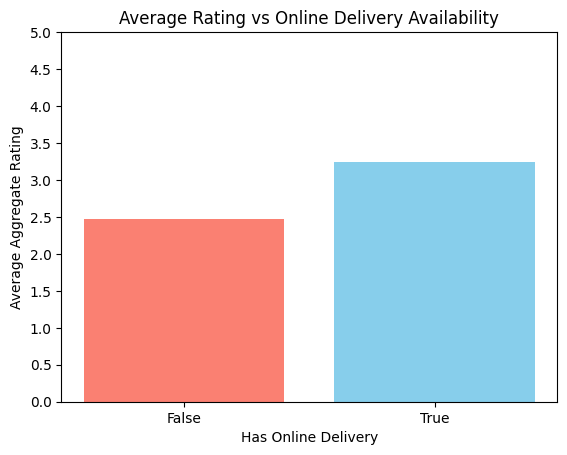

In [22]:
# Step 1: Group by boolean column
grouped_data = df.groupby('Has Online delivery')['Aggregate rating'].mean()

# Step 2: Bar plot
plt.bar(grouped_data.index.astype(str), grouped_data.values, color=['salmon', 'skyblue'])
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Rating vs Online Delivery Availability')
# Optional: y-axis ticks
interval = np.arange(0, 5.1, 0.5)
plt.yticks(interval)
plt.show()


### Insight:
Restaurants with online delivery appear to have __higher average ratings__, suggesting a potential correlation between convenience and satisfaction.


### Q2: Does Table Booking Impact Customer Ratings?

Now we analyze whether allowing table bookings is associated with better ratings.


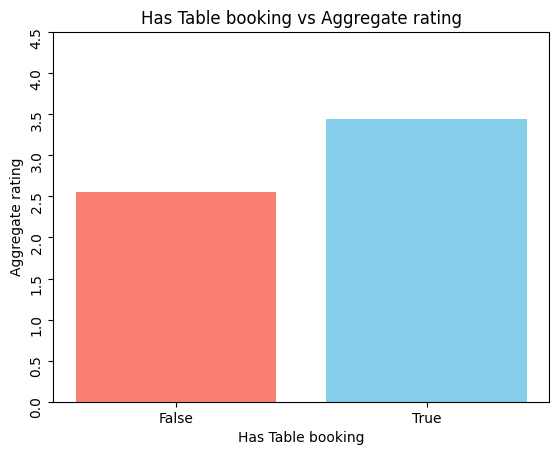

In [23]:
grouped_data = df.groupby('Has Table booking')['Aggregate rating'].mean()
plt.bar(grouped_data.index.astype(str), grouped_data.values, color=['salmon', 'skyblue'])
plt.xlabel('Has Table booking')
plt.ylabel('Aggregate rating')
plt.title('Has Table booking vs Aggregate rating')
interval=np.arange(0,5,0.5)
plt.yticks(interval,rotation=90)
plt.show()

### Insight:
Higher ratings are seen in restaurants that offer table bookings. This may reflect better overall service or ambiance.


### Q3: Does Price Range Influence Ratings?

We explore whether more expensive restaurants get better ratings.


In Zomato-style datasets, Price range is an ordinal scale representing how expensive a restaurant is:

Price range	Interpretation:

1	->Cheap / Low

2 ->Medium-low

3	->Medium-high

4	->Expensive / Premium

So, **higher** numbers = **higher** cost level, not actual currency amounts — just a category tag.

In [24]:
df['Price range'].unique()

array([3, 4, 2, 1])

In [25]:
df['Price range'].value_counts().sort_index()


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

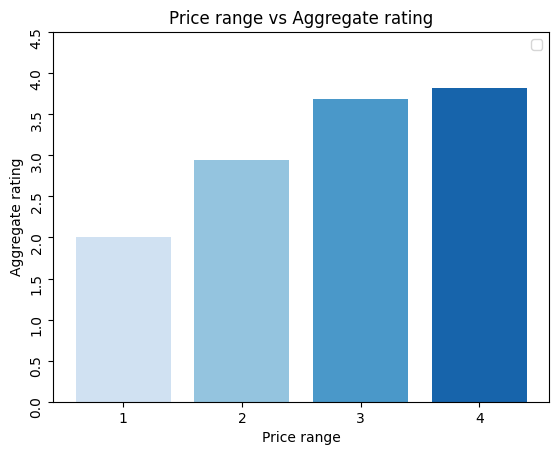

In [26]:
grouped_data=df.groupby('Price range')['Aggregate rating'].mean()


colors = sns.color_palette("Blues", 4)

plt.bar(grouped_data.index.astype(str), grouped_data.values, color=colors)

plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.title('Price range vs Aggregate rating')
plt.legend()
interval=np.arange(0,5,0.5)
plt.yticks(interval,rotation=90)
plt.show()

### Insight:
There is a clear positive trend — higher-priced restaurants tend to receive better ratings.


# **📈More Visualization:**

---



 Barplot: online_delivery vs mean rating (with price range as hue)

 Boxplot: price_range vs rating

 Countplot: Rating text

 Heatmap: Correlation between Votes, Cost, Rating

### Q: Does the Impact of Online Delivery on Ratings Change by Price Range?

Let’s analyze if the **effect of offering online delivery** on customer ratings **varies across different price ranges**.


<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

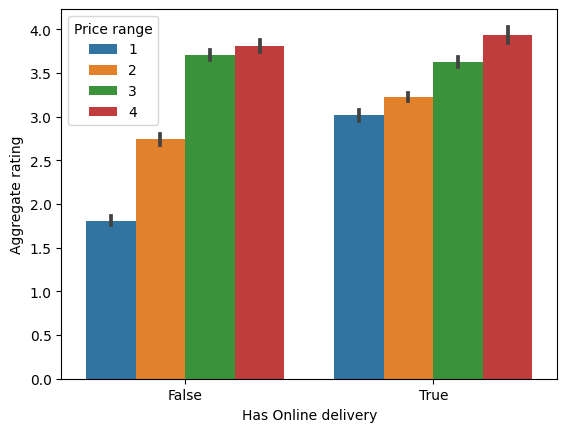

In [27]:
sns.barplot(data=df, x='Has Online delivery', y='Aggregate rating', hue='Price range')


### Insight:
- Across **all price ranges**, restaurants offering **online delivery** tend to have **higher average ratings** than those that don’t.
- This difference is especially **noticeable in lower price ranges (1 & 2)** — suggesting that online delivery is more appreciated by customers looking for affordable options.
- For **premium restaurants (Price Range 4)**, the rating difference is **smaller**, possibly because customer expectations are already high.

✅ This indicates that online delivery boosts customer satisfaction more **for budget and mid-range restaurants**.


### Q: How Do Ratings Vary Across Different Price Ranges?

Let’s explore how customer ratings are distributed within each price range using a boxplot.


<Axes: xlabel='Price range', ylabel='Aggregate rating'>

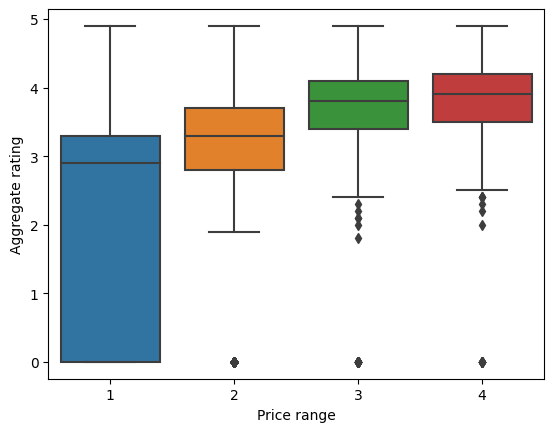

In [28]:
sns.boxplot(data=df, x='Price range', y='Aggregate rating')

### Insight:
- There is a **positive trend**: as the **price range increases**, the **median aggregate rating also increases**.
- Restaurants in **Price Range 4** have **higher and more consistent ratings** with **fewer low-rated outliers**.
- Lower-priced restaurants (Price Range 1) show **wider spread** and **lower median ratings**, suggesting **more variability** in customer experience.
- The boxplot clearly shows that **price is a factor in quality perception** — higher-priced places are rated better on average.

✅ Conclusion: **Premium restaurants tend to receive more favorable and consistent ratings** compared to budget ones.


### Q: What’s the Overall Rating Distribution?

This shows how restaurants are rated in categories like "Average", "Very Good", etc.


<Axes: xlabel='Rating text', ylabel='count'>

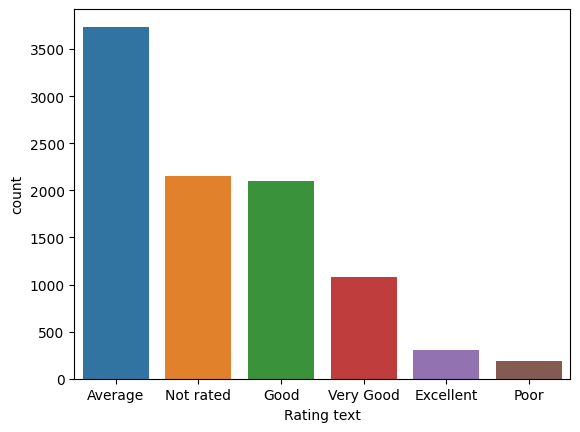

In [29]:
sns.countplot(data=df, x='Rating text', order=df['Rating text'].value_counts().index)

### Insight:
Most ratings fall in the **"Average" to "Not rated"** range. Very few are rated "Excellent" or "Poor".


 ### Q: Are Votes, Cost and Ratings Correlated?

Let’s visualize the correlation between numerical columns to find any strong relationships.


<Axes: >

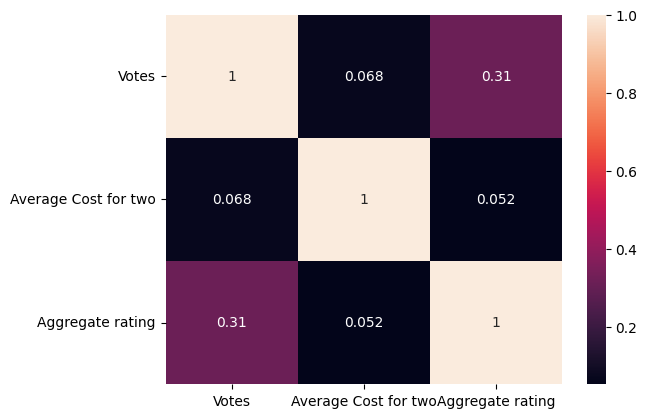

In [30]:
sns.heatmap(df[['Votes', 'Average Cost for two', 'Aggregate rating']].corr(), annot=True)

### Insight:
- Ratings and Votes have a **moderate positive correlation**[as it lies in the range 0.3 to 0.7 i.e (0.31)].
- Cost shows weaker correlation with rating but may still matter in premium restaurants.


### Q: Do Restaurants with Online Delivery Receive More Customer Votes?

This bar plot shows the average number of votes received based on online delivery status.


<Axes: xlabel='Has Online delivery'>

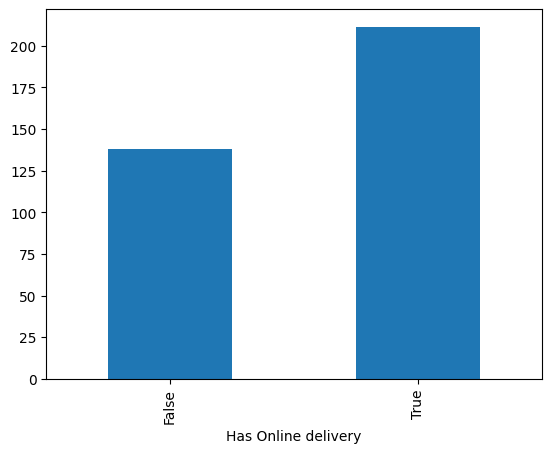

In [31]:
df.groupby('Has Online delivery')['Votes'].mean().plot(kind='bar')


### Insight:
- Restaurants that offer **online delivery receive significantly more votes** on average.
- This may suggest:
  - Higher visibility on delivery platforms
  - Increased customer engagement and feedback
  - More frequent or wider usage

✅ This supports the idea that **online delivery can help boost a restaurant’s online presence and reach**.


In [32]:
df['Average Cost for two'].value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

### Q: Do Highly Rated Restaurants Tend to Be More Expensive?

This plot shows the average cost for two people across different rating scores.


<Axes: xlabel='Aggregate rating'>

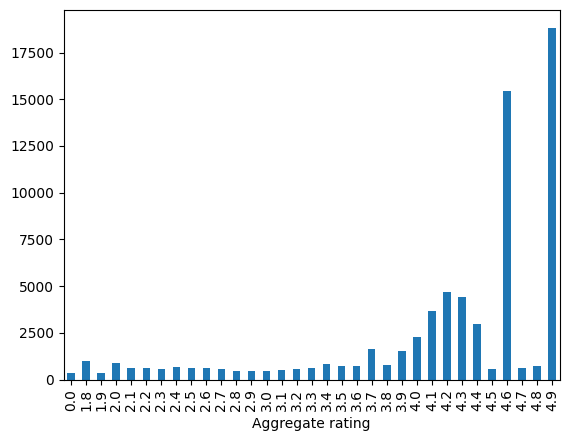

In [33]:
df.groupby('Aggregate rating')['Average Cost for two'].mean().plot(kind='bar')


### Insight:
- Generally, restaurants with **higher ratings tend to have higher average costs**, especially above rating 3.5.
- Low-rated restaurants (below 2.5) show lower average cost for two.
- However, the relationship isn’t perfectly linear — some moderately rated places also have high costs.

✅ This suggests that **more expensive restaurants are often rated higher**, but **price alone doesn’t guarantee quality**.


### Q: Is There a Link Between Cost and Rating?

We visualize cost vs rating to see if more expensive restaurants receive better reviews.


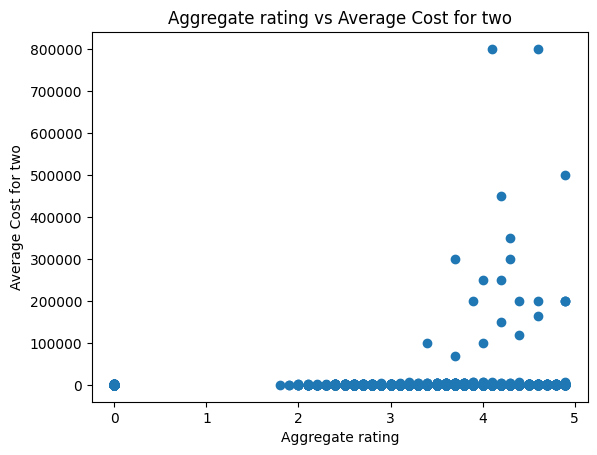

In [34]:
plt.scatter(df['Aggregate rating'],df['Average Cost for two'])
plt.xlabel('Aggregate rating')
plt.ylabel('Average Cost for two')
plt.title('Aggregate rating vs Average Cost for two')
plt.show()

### Insight:
There’s **no strong trend**, but higher-cost restaurants tend to cluster in higher rating zones.


### Q: Do Different Cuisines Receive Different Ratings?

Let's use a boxplot to examine how ratings vary across popular cuisines.


In [35]:
df['Primary Cuisine'] = df['Cuisines'].str.split(',').str[0].str.strip()


In [36]:
df.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)


Primary Cuisine
Sunda             4.900000
Scottish          4.700000
Cajun             4.700000
Taiwanese         4.650000
Filipino          4.616667
                    ...   
Tea               1.541176
Nepalese          1.000000
Awadhi            0.760000
Afghani           0.414286
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 119, dtype: float64

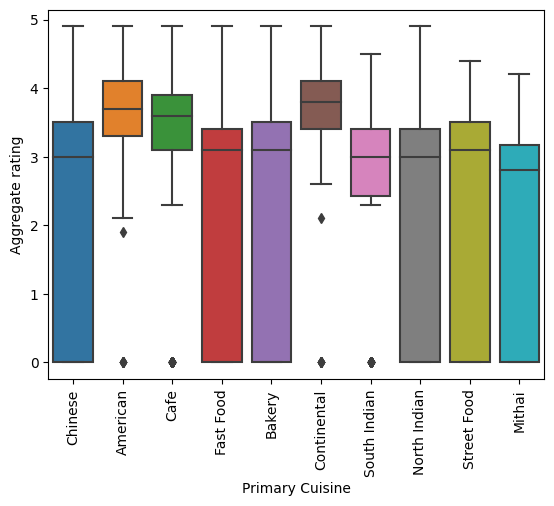

In [37]:
top_cuisines = df['Primary Cuisine'].value_counts().head(10).index
sns.boxplot(x='Primary Cuisine', y='Aggregate rating', data=df[df['Primary Cuisine'].isin(top_cuisines)])
sns.set_style("whitegrid")
plt.xticks(rotation=90)
plt.show()

### Insight:
Some cuisines (e.g., American or Continental) show higher median ratings, while others show wider spread.


### Top 10 Cities with Most and Least Restaurants in Dataset

This helps us understand which regions dominate the data, and may bias results.

Comparison of ratings in Top 10 cities and Bottom 10 cities

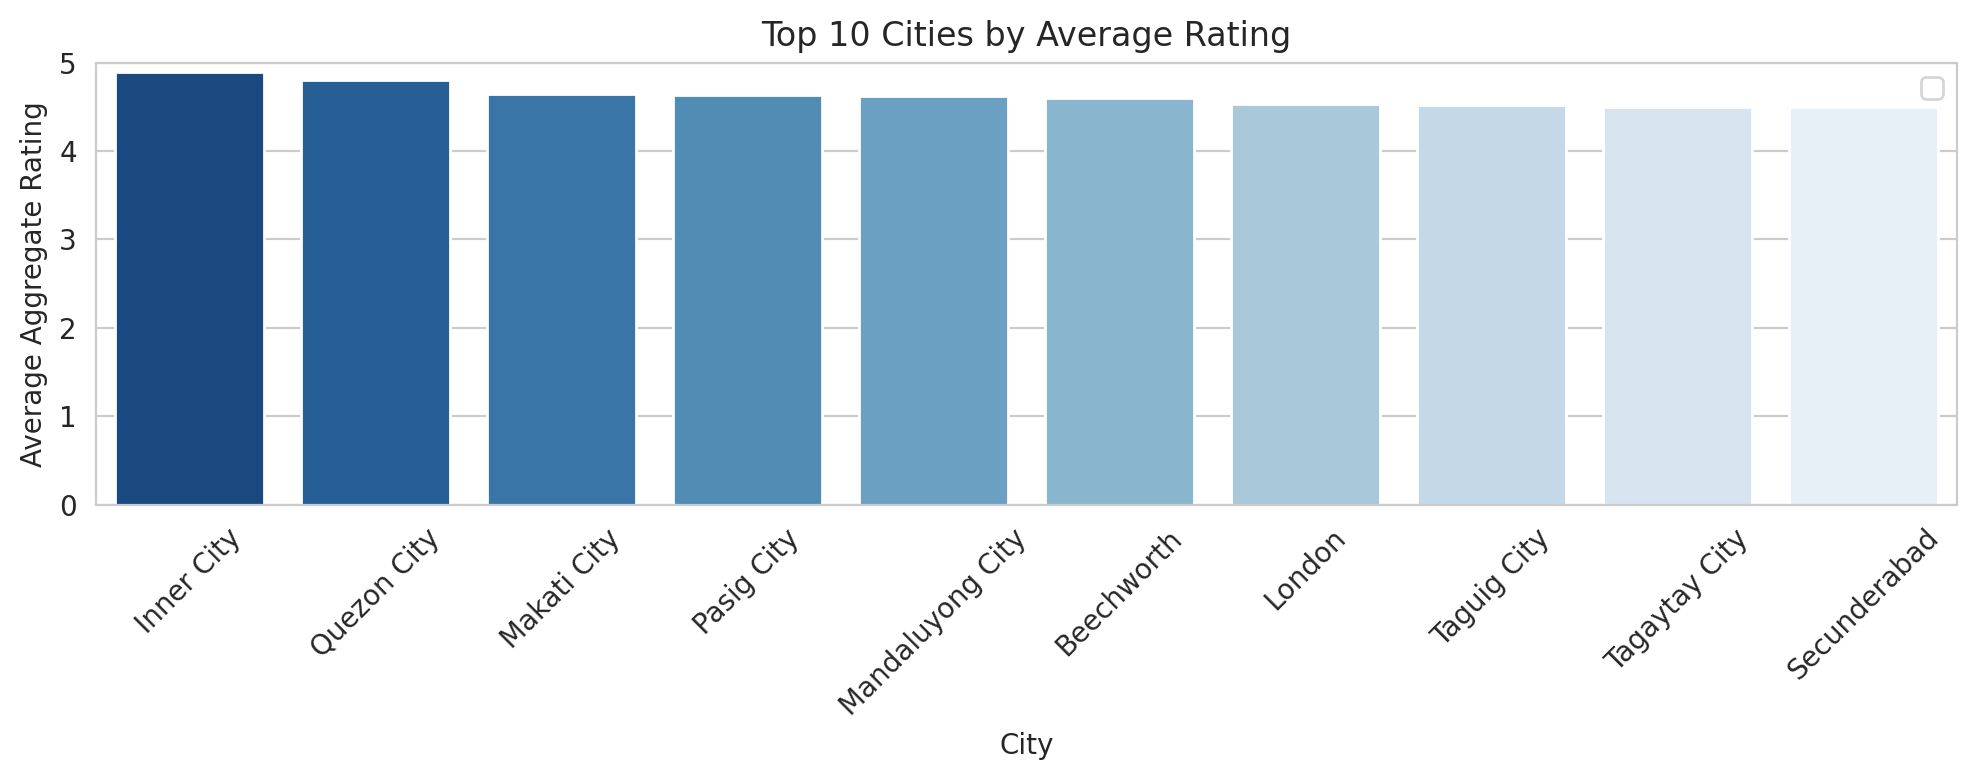

In [39]:
top_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4),dpi=200)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_r')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()



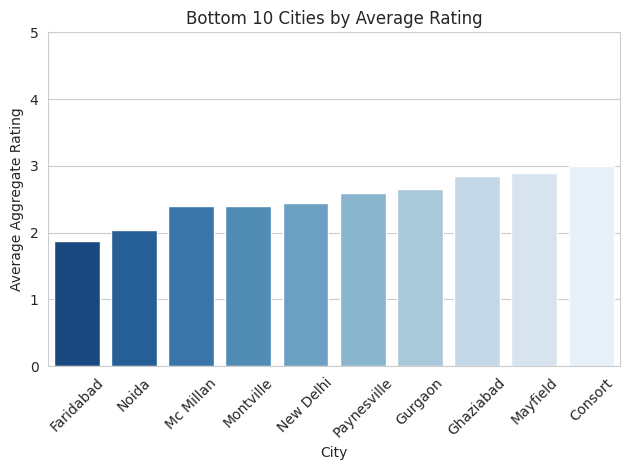

In [40]:
bottom_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=True).head(10)

sns.barplot(x=bottom_cities.index, y=bottom_cities.values, palette='Blues_r')
plt.title('Bottom 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


### Insight:
“The top-rated cities, such as Inner City, Quezon City, etc., show consistently high aggregate ratings (above 4.5), while the bottom-rated cities Consort and Mayfield are at average below 2.5. This suggests significant regional variation in customer satisfaction or service quality.”



## **🧪 Phase 3: Hypothesis Testing**

In [41]:
df_numeric = df.select_dtypes(include='number')  # keeps only int/float cols
df_numeric.corr()
 #more positive -> related to each other

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


In [42]:
import scipy.stats as stats
from scipy.stats import ttest_ind

# **🧩 Q1: Does Online Delivery affect customer ratings?**

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  There is **no difference** in the mean aggregate ratings between restaurants that offer online delivery and those that do not.  
  → μ₁ = μ₂

- **H₁ (Alternative Hypothesis):**  
  There **is a difference** in the mean aggregate ratings between the two groups.  
  → μ₁ ≠ μ₂

In [43]:
#✅ Test: ttest_ind (Independent t-test)

#filtering the DataFrame to include only restaurants that offer online delivery, and then extracts their Aggregate rating values.
delivery_yes = df[df['Has Online delivery'] == True]['Aggregate rating']

delivery_no = df[df['Has Online delivery'] == False]['Aggregate rating']

t_stat, p_val = stats.ttest_ind(delivery_yes, delivery_no, nan_policy='omit')
print("Online Delivery t-test → t =", t_stat, ", p =", p_val)

Online Delivery t-test → t = 22.639219551643542 , p = 1.4004463504119023e-110


In [44]:
if p_val < 0.05:
 print('There is a significant difference in ratings between restaurants with and without online delivery')
else:
  print('There is no significant difference in ratings between restaurants with and without online delivery')

There is a significant difference in ratings between restaurants with and without online delivery


💡Insight:
Online delivery is significantly associated with higher customer ratings. This could reflect greater convenience, service quality, or digital presence.

“Restaurants that offer online delivery tend to have significantly different (probably higher) average ratings than those that don’t.”

# **🧩 Q2: Does Table Booking availability impact ratings?**

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  There is **no difference** in the mean aggregate rating between restaurants that offer table booking and those that don’t.  
  → μ₁ = μ₂

- **H₁ (Alternative Hypothesis):**  
  There **is a significant difference** in mean aggregate rating between the two groups.  
  → μ₁ ≠ μ₂


In [45]:
table_booking_yes = df[df['Has Table booking'] == True]['Aggregate rating']
table_booking_no = df[df['Has Table booking'] == False]['Aggregate rating']
t_stat, p_val = stats.ttest_ind(table_booking_yes, table_booking_no, nan_policy='omit')
print("Table Booking t-test → t =", t_stat, ", p =", p_val)

Table Booking t-test → t = 18.910847884366653 , p = 2.480851913366005e-78


In [46]:
if p_val < 0.05:
 print('There is a significant difference in ratings between restaurants with and without table booking')
else:
  print('There is no significant difference in ratings between restaurants with and without table booking')

There is a significant difference in ratings between restaurants with and without table booking


💡 Insight:
Online delivery is significantly associated with higher customer ratings. This could reflect greater convenience, service quality, or digital presence.

# **🧩 Q3: Are Rating Text and Online Delivery related?**

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  Online delivery and rating text are **independent**.  
  (A restaurant’s delivery option has **no effect** on the type of rating text it receives.)

- **H₁ (Alternative Hypothesis):**  
  Online delivery and rating text are **associated**.  
  (Whether or not a restaurant offers delivery **does affect** the type of rating text it receives.)


In [47]:
contingency = pd.crosstab(df['Has Online delivery'], df['Rating text'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-square test → χ² =", chi2, ", p =", p ,", dof =", dof , ', the expected counts=',expected)

Chi-square test → χ² = 886.8785206393043 , p = 1.84017629666612e-189 , dof = 5 , the expected counts= [[2778.00230342  223.75667469 1561.09307926 1596.77520678  138.26824416
   802.10449168]
 [ 958.99769658   77.24332531  538.90692074  551.22479322   47.73175584
   276.89550832]]


In [48]:
if p < 0.05:
 print('There is a significant association between Online Delivery and Rating Text')
else:
  print('There is no significant association between Online Delivery and Rating Text')

There is a significant association between Online Delivery and Rating Text


💡 Insight:
Offering online delivery is statistically associated with better customer feedback (based on rating text).

This could reflect factors like convenience, accessibility, and digital engagement.

# **🧩 Q4: Is there a relationship between Price Range and Ratings?**

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  The **mean aggregate rating is equal** across all price ranges.  
  (Price range does **not influence** customer rating.)

- **H₁ (Alternative Hypothesis):**  
  At least **one price range** has a **different mean rating** than the others.


In [49]:
#✅ Test: ANOVA (f_oneway)
grouped = [group['Aggregate rating'].dropna() for _, group in df.groupby('Price range')]
f_stat, p_val = stats.f_oneway(*grouped)
print("ANOVA Price Range → F =", f_stat, ", p =", p_val)


ANOVA Price Range → F = 807.034563351431 , p = 0.0


In [50]:
if p_val<0.05:
  print("There is a significant difference in ratings between price ranges")
else:
  print("There is no significant difference in ratings between price ranges")

There is a significant difference in ratings between price ranges


💡 Insight:
Higher price ranges (3 & 4) typically show higher and more consistent average ratings, while the lowest price range (1) shows lower average ratings.

This suggests that price is positively associated with perceived quality, at least in the eyes of customers.

“The ANOVA test shows that price range has a significant effect on average customer ratings (F = 807.03, p < 0.001). This suggests that customers rate restaurants differently based on pricing tiers — possibly because of service expectations, food quality, or value for money.”

# **🧩Q5: Do restaurants with more votes have higher (or lower) average ratings?**
Votes = The number of users who rated or reviewed that restaurant.

📊 It’s a count of how many people contributed to the aggregate rating.

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  There is **no linear correlation** between number of votes and aggregate rating.  
  (Correlation coefficient ρ = 0)

- **H₁ (Alternative Hypothesis):**  
  There **is a linear correlation** between votes and ratings.  
  (Correlation coefficient ρ ≠ 0)

In [51]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['Votes'], df['Aggregate rating'])
print("Correlation between Votes and Rating:", corr, "P-value:", p)


Correlation between Votes and Rating: 0.3136905841954114 P-value: 4.21514919429181e-217


In [52]:
if p < 0.05:
 print('There is a significant correlation between Votes and Rating')
else:
  print('There is no significant correlation between Votes and Rating')

if corr > 0:
 print('Votes and Rating are positively correlated')
elif corr < 0:
 print('Votes and Rating are negatively correlated')
else:
 print('Votes and Rating are not correlated')


There is a significant correlation between Votes and Rating
Votes and Rating are positively correlated


If corr is positive: More votes = higher ratings

If corr is negative: More votes = lower ratings (maybe more criticism?)

If p < 0.05: Correlation is statistically significant

💡 Insight:
As the number of votes increases, the aggregate rating tends to be higher.

Restaurants with more reviews/engagement are likely to have built more credibility, which reflects in better ratings.

However, since correlation ≠ causation, we can’t say one causes the other — just that they move together.

# **🧩Q6: Are the average ratings for these 5 cuisines significantly different from each other?**

### ✅ Hypotheses:

- **H₀ (Null Hypothesis):**  
  All cuisine types have **the same average customer rating**.  
  (Cuisine has no impact on rating.)

- **H₁ (Alternative Hypothesis):**  
  At least one cuisine type has a **different average rating** than the others.

In [53]:
groups = [df[df['Primary Cuisine'] == cuisine]['Aggregate rating'].dropna() for cuisine in top_cuisines]
f_stat, p_val = stats.f_oneway(*groups)
print("Cuisine vs Rating ANOVA → F =", f_stat, ", p =", p_val)


Cuisine vs Rating ANOVA → F = 59.37574746190719 , p = 3.142873513989637e-105


In [54]:
if p< 0.05:
 print('There is a significant difference in ratings between cuisines')
else:
  print('There is no significant difference in ratings between cuisines')

There is a significant difference in ratings between cuisines


💡 Insight:
Some cuisines are consistently better rated than others — possibly due to customer taste preferences, preparation quality, or cultural familiarity.